In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print("train (rows,cols):",train.shape)
print("test (rows,cols)",test.shape)

train (rows,cols): (1460, 81)
test (rows,cols) (1459, 80)


In [2]:
# remove the Id column
train.drop("Id", axis = 1, inplace = True)

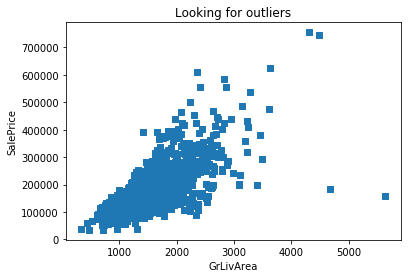

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

#checking for any outliers
plt.scatter(train.GrLivArea, train.SalePrice, marker="s")
plt.title("Looking for outliers")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()

In [4]:
#There seem to be outliers where the size of the house is larger than 4000 sq. ft
#It would be best to remove them
train = train[train.GrLivArea < 4000]

In [5]:
#Look at the correlation to sale price and select the top 10 for the model
corr = train.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000
OverallQual      0.801
GrLivArea        0.721
GarageCars       0.649
TotalBsmtSF      0.647
GarageArea       0.637
1stFlrSF         0.625
FullBath         0.559
TotRmsAbvGrd     0.537
YearBuilt        0.535
YearRemodAdd     0.521
GarageYrBlt      0.499
MasVnrArea       0.479
Fireplaces       0.467
BsmtFinSF1       0.396
LotFrontage      0.357
OpenPorchSF      0.330
WoodDeckSF       0.323
2ndFlrSF         0.297
HalfBath         0.283
LotArea          0.270
BsmtFullBath     0.236
BsmtUnfSF        0.221
BedroomAbvGr     0.161
ScreenPorch      0.118
MoSold           0.057
3SsnPorch        0.047
PoolArea         0.033
BsmtFinSF2      -0.009
MiscVal         -0.021
YrSold          -0.024
LowQualFinSF    -0.025
BsmtHalfBath    -0.037
OverallCond     -0.080
MSSubClass      -0.088
EnclosedPorch   -0.130
KitchenAbvGr    -0.139
Name: SalePrice, dtype: float64


In [6]:
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

# Use root mean square error for checking the error
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [7]:
from sklearn.model_selection import cross_val_score, train_test_split

#Select the top 10 highest correlating factors
features = ["OverallQual","GrLivArea","GarageCars","TotalBsmtSF","GarageArea","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]
X = train[features]

y = train.SalePrice

# Use 80% of the train data to test the model, then check using the remaining 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

X_train : (1164, 10)
X_test : (292, 10)
y_train : (1164,)
y_test : (292,)


In [8]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

# create the linear regression model using the train data
lr = LinearRegression()
lr.fit(X_train, y_train)

# calculate the root mean square error on the train and test data
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

RMSE on Training set : 32573.81690067953
RMSE on Test set : 31976.080622105586


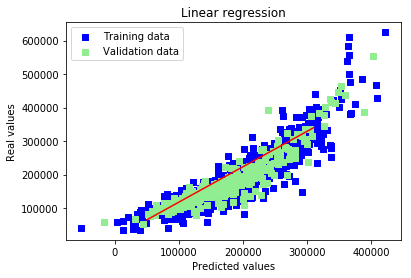

In [9]:
# Show a plot of the training and test data and the linear model used to predict it
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([50000,310000], [65000, 340000], c = "red")
plt.show()

In [10]:
# Generate test data
#replace NAs with dummy data
test.loc[:, "TotalBsmtSF"] = test.loc[:, "TotalBsmtSF"].fillna(0)
test.loc[:, "GrLivArea"] = test.loc[:, "GrLivArea"].fillna(0)
test.loc[:, "GarageArea"] = test.loc[:, "GarageArea"].fillna(0)
test.loc[:, "GarageCars"] = test.loc[:, "GarageCars"].fillna(0)
#featuresID = ["Id","OverallQual","GrLivArea","GarageCars","TotalBsmtSF","GarageArea","1stFlrSF","FullBath","TotRmsAbvGrd","YearBuilt","YearRemodAdd"]
X_final = test[features]
output = test[["Id"]]
#output data to CSV file
output["SalesPrice"] = lr.predict(X_final)
print(output)
output[["Id","SalesPrice"]].to_csv("output.csv",index=False)

        Id  SalesPrice
0     1461  119342.344
1     1462  164096.961
2     1463  171563.427
3     1464  186034.744
4     1465  213433.270
5     1466  177954.165
6     1467  170864.891
7     1468  168494.566
8     1469  209967.158
9     1470  101020.238
10    1471  209630.919
11    1472  112546.927
12    1473  105902.720
13    1474  158329.241
14    1475  140177.816
15    1476  328536.665
16    1477  266410.532
17    1478  291258.866
18    1479  285646.656
19    1480  408047.356
20    1481  306671.092
21    1482  230669.178
22    1483  189781.432
23    1484  188408.603
24    1485  170255.271
25    1486  209597.695
26    1487  323917.502
27    1488  270126.166
28    1489  208289.798
29    1490  208734.824
...    ...         ...
1429  2890   44297.472
1430  2891  159885.945
1431  2892    8425.506
1432  2893   99535.961
1433  2894   16571.247
1434  2895  267877.628
1435  2896  259255.516
1436  2897  210511.301
1437  2898  213809.158
1438  2899  240073.239
1439  2900  159606.196
1440  2901 

/home/n/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
